In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [2]:
# load R2 scores

In [3]:
def get_IDs(path):
    separated = path.split(os.sep)
    return tuple(separated[7:10])

In [4]:
to_load_R2 = glob.glob('/home/kele/Documents/lai/lai-sim/results/AmericanAdmixture_4B11/AA_42/*/SUMMARY/R2_score.ancestry.tsv')
to_load_R2 += glob.glob('/home/kele/Documents/lai/lai-sim/results/OutOfAfrica_4J17/4pop_79/*/SUMMARY/R2_score.ancestry.tsv')
R2_dict = {}
for f in to_load_R2:
    df = pd.read_csv(f, sep ='\t')
    model_name, sim_id, anal_id = get_IDs(f)
    df[['model_name', 'sim_id', 'anal_id']] = model_name, sim_id, anal_id
    R2_dict[f] = df.set_index([ 'model_name', 'sim_id', 'anal_id', 'method'])
R2_anc = pd.concat(R2_dict.values())
R2_anc = R2_anc.query("anal_id not in ['long_run', 'short_run']")

In [5]:
to_load_R2 = glob.glob('/home/kele/Documents/lai/lai-sim/results/AmericanAdmixture_4B11/AA_42/*/SUMMARY/R2_score.individuals.tsv')
to_load_R2 += glob.glob('/home/kele/Documents/lai/lai-sim/results/OutOfAfrica_4J17/4pop_79/*/SUMMARY/R2_score.individuals.tsv')

R2_dict = {}
for f in to_load_R2:
    df = pd.read_csv(f, sep ='\t')
    model_name, sim_id, anal_id = get_IDs(f)
    df[['model_name', 'sim_id', 'anal_id']] = model_name, sim_id, anal_id
    R2_dict[f] = df.set_index([ 'model_name', 'sim_id', 'anal_id', 'method'])
R2_ind = pd.concat(R2_dict.values())
R2_ind = pd.concat(R2_dict.values())
R2_ind = R2_ind.query("anal_id not in ['long_run', 'short_run']")

In [6]:
names_dict = {}
names_dict['3pop_1'] = '100 admixed'
names_dict['3pop_2'] = '200 admixed'
names_dict['3pop_3'] = '400 admixed'
names_dict['3pop_4'] = 'smaller Ref (200)'
names_dict['3pop_5'] = 'smaller Ref (800)'
names_dict['3pop_6'] = 'more sites (200K)'
names_dict['3pop_7'] = 'lower geno error (1e-5)'
names_dict['3pop_8'] = 'hiher geno error (4e-4)'
names_dict['3pop_9'] = 'fewer cores (4)'
names_dict['4pop_test'] = 'Four pops'

In [27]:
sns.set_context('notebook', font_scale= 1.4)

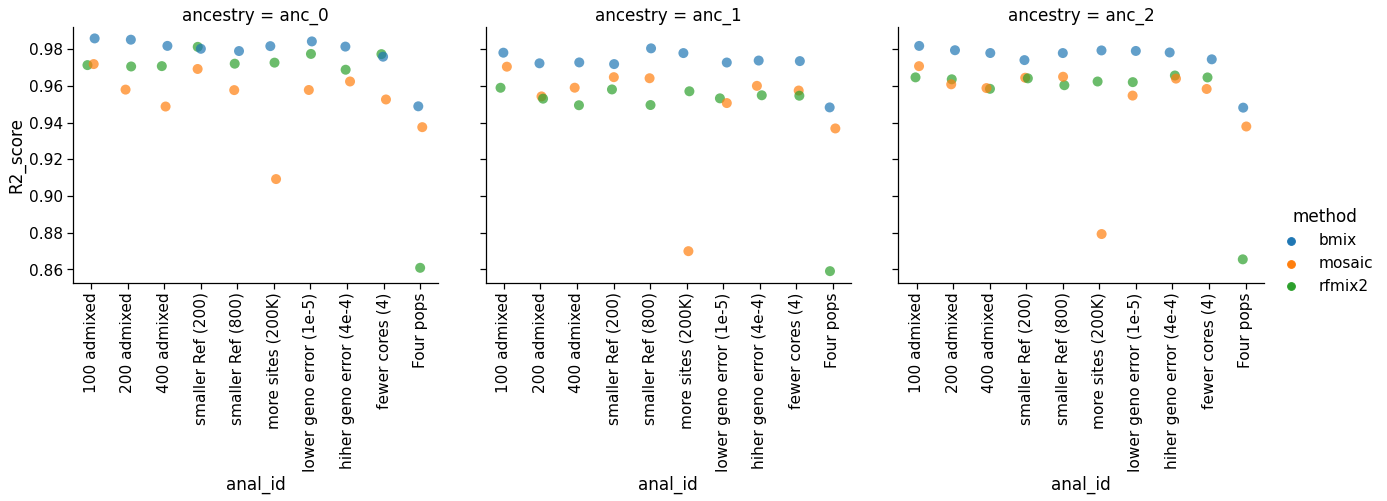

In [37]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')
g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    col='ancestry',
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    col_order=['anc_0', 'anc_1', 'anc_2'],
    data=data.sort_values('anal_id'),
    dodge=False,
    alpha=.7,
    kind='strip',
    aspect=1.2,
    s=10
)

g.set_xticklabels(list(names_dict.values()), rotation=90)

In [36]:
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')
data.groupby('method')['R2_score'].mean()

method
bmix      0.974328
mosaic    0.950438
rfmix2    0.950405
Name: R2_score, dtype: float64

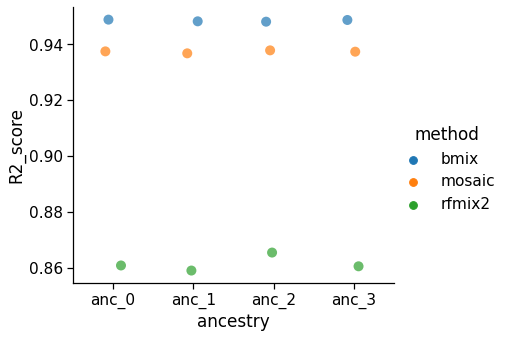

In [29]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')
g = sns.catplot(
    x="ancestry",
    y="R2_score",
    hue="method",
    #col='ancestry',
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    order=['anc_0', 'anc_1', 'anc_2', 'anc_3'],
    data=data.sort_values('anal_id').query('anal_id=="4pop_test"'),
    dodge=False,
    alpha=.7,
    kind='strip',
    aspect=1.2,
    s=10
)

#g.set_xticklabels(list(names_dict.values()), rotation=60)

In [30]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')
g = sns.catplot(
    x="ancestry",
    y="R2_score",
    hue="method",
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    order=['anc_0', 'anc_1', 'anc_2', 'anc_3'],
    data=data.sort_values('anal_id').query('anal_'),
    dodge=True,
    alpha=.5,
    zorder=1,
    kind='strip',
    aspect = 1,
    s=10
)

UndefinedVariableError: name 'anal_' is not defined

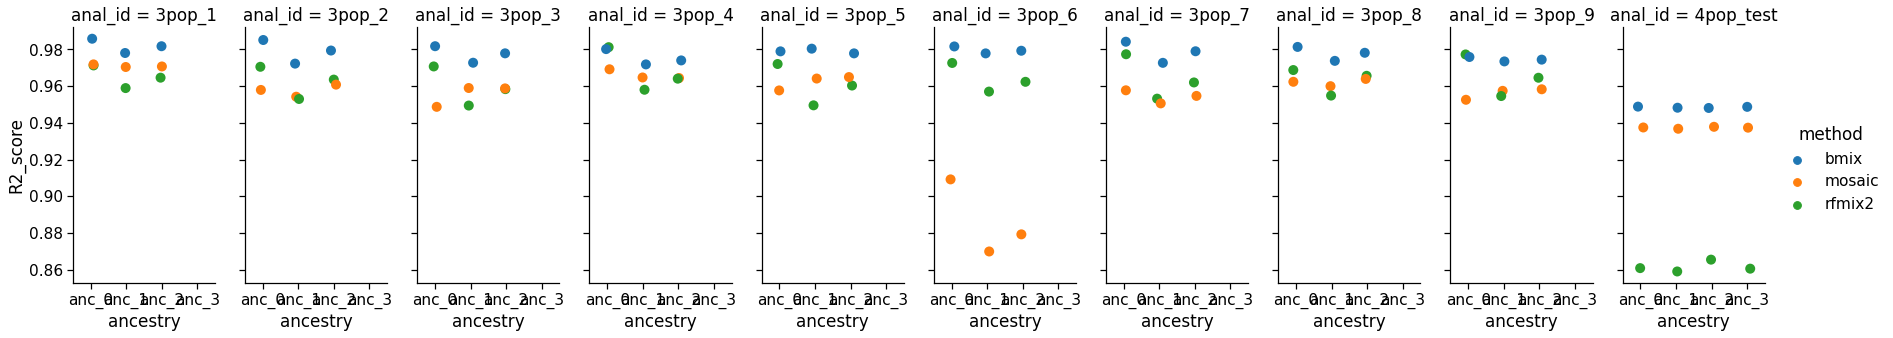

In [31]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')
sns.catplot(
    x="ancestry",
    y="R2_score",
    hue="method",
    col='anal_id',
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    order=['anc_0', 'anc_1', 'anc_2', 'anc_3'],
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    data=data.sort_values('anal_id'),
    dodge=0,
    alpha=1,
    zorder=1,
    kind='strip',
    aspect=.5,
    s=10
)

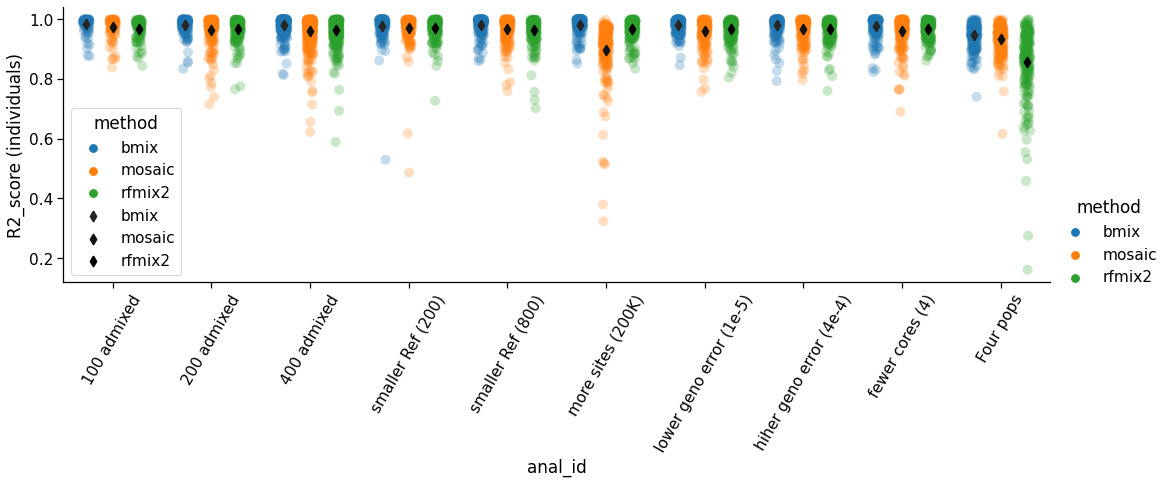

In [33]:
# Show each observation with a scatterplot
data = pd.melt(R2_ind.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ind', value_name='R2_score')
g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    data=data.sort_values('anal_id'),
    dodge=1,
    alpha=.25,
    zorder=1,
    kind='strip',
    aspect=3,
    s=10
)

sns.pointplot(x="anal_id",
    y="R2_score",
    hue="method",
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    data=data.sort_values('anal_id'),
    dodge=.8 - .8 / 3,
    join=False,
    #palette="dark",
    color='k',
    markers="d",
    scale=1,
    ci=None,
    alpha = 1)

g.set_xticklabels(list(names_dict.values()), rotation=60)
g.set_ylabels('R2_score (individuals)')